# **Supervised and Unsupervised**

#### Rehana Putri Salsabila 5027221015
#### Etha Felisya Br Purba  5027221017

About Dataset

Customer Personality Analysis involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.

By conducting a Customer Personality Analysis, businesses can refine their products based on the preferences of specific customer segments. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.


In [ ]:
# import requirements library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.impute import SimpleImputer
import numpy as np
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Import Data

In [ ]:
# Pastikan file .csv berada pada directory yang sama
df = pd.read_csv("customer_segmentation.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# **Exploratory Data Analysis**

EDA adalah singkatan dari Exploratory Data Analysis. Ini adalah proses analisis data yang dilakukan untuk memahami struktur dan karakteristik dari data yang digunakan dalam konteks machine learning atau statistik. Tujuannya adalah untuk mengidentifikasi pola, anomali, hubungan, dan kecenderungan dalam data, serta untuk menemukan wawasan yang dapat membantu dalam pemodelan data lebih lanjut.

In [ ]:
# get the shape of the dataset
df.shape

(2240, 29)

In [ ]:
# get info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Statistik Deskriptif

In [ ]:
# get statistical summary
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Handling Missing Value

In [ ]:
# checking missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
numerik_imputer = SimpleImputer(strategy="median")
numericalCollumn = ["Income"]

for col in numericalCollumn:
    df[col] = numerik_imputer.fit_transform(df[[col]]).squeeze()

df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Feature Engineering

Feature engineering adalah proses menciptakan atau memilih fitur-fitur yang paling relevan dan bermanfaat dari data mentah untuk digunakan dalam pembuatan model machine learning. Tujuannya adalah untuk meningkatkan kinerja model dengan meningkatkan kualitas fitur yang digunakan untuk pembelajaran.

In [ ]:
# Assuming df is your DataFrame
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')

dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)

# Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:", max(dates))
print("The oldest customer's enrolment date in the records:", min(dates))


The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [ ]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [ ]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [ ]:
#Age of customer today
df["Age"] = 2024-df["Year_Birth"]

#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,0.149107,3.054950e+16,55.194196,605.798214,0.950446,2.595089,0.715179
std,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.356274,1.746339e+16,11.984069,602.249288,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.561680e+16,47.000000,68.750000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,54.000000,396.000000,1.000000,3.000000,1.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,65.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


In [ ]:

#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

## Handling Outliers

In [ ]:
#Dropping the outliers by setting a cap on Age and income.
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

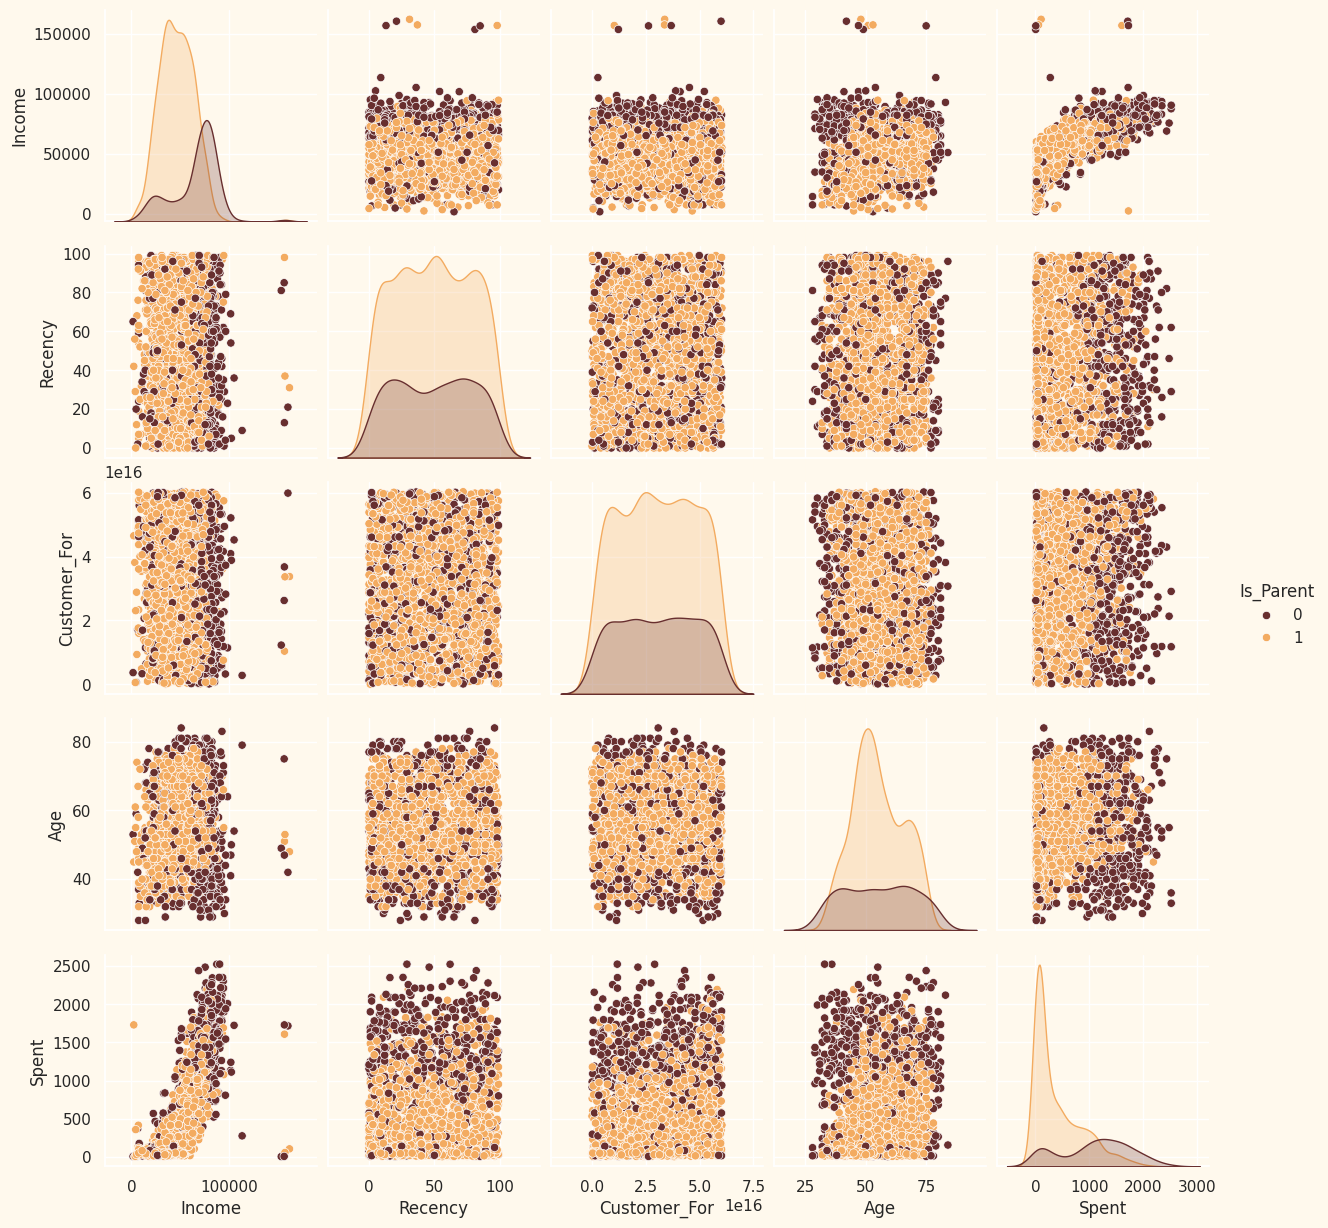

In [ ]:

#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

# **Data Preprocessing**

Data preprocessing adalah langkah penting dalam analisis data dan machine learning yang melibatkan transformasi data mentah menjadi format yang lebih mudah diolah. Proses ini meliputi berbagai tahapan untuk memastikan data yang digunakan bersih, relevan, dan dalam bentuk yang sesuai untuk analisis lebih lanjut atau untuk model machine learning. Pada proses data pre prosessing ini kami melakukan beberapa tahapan :
1. Handling categorical data ( Menggunakan label_encoder )
2. Mencari korelasi dari data yang sudah diolah
3. Melakukan future selection untuk memilih subset dari fitur (variabel) yang paling relevan dan signifikan untuk digunakan dalam pembangunan model.
4. Normalisasi untuk mengubah skala fitur dalam dataset sehingga mereka memiliki nilai yang berada dalam rentang tertentu, biasanya [0, 1]. Memastikan bahwa semua fitur berkontribusi secara proporsional dalam analisis atau model machine learning.
5. PCA mengurangi dimensi dataset yang mengubah fitur asli menjadi fitur baru (principal components) untuk mereduksi dimensi dataset.

## Handling Categorical Data

In [ ]:
df.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer_For             int64
Age                      int64
Spent                    int64
Living_With             object
Children                 int64
Family_Size              int64
Is_Parent                int64
dtype: object

In [ ]:
df["Education"].value_counts()

Education
Graduate         1126
Postgraduate      855
Undergraduate     255
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

mapping = {'Graduate': 0, 'Postgraduate': 1, 'Undergraduate': 2}
df['Education'] = df['Education'].map(mapping)
ordinal_encoder = OrdinalEncoder()

encoded_data = ordinal_encoder.fit_transform(df[['Education']])
df['Education'] = encoded_data
df


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0.0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,67,1617,Alone,0,1,0
1,0.0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,70,27,Alone,2,3,1
2,0.0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,59,776,Partner,0,2,0
3,0.0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,40,53,Partner,1,3,1
4,1.0,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,43,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,32918400000000000,57,1341,Partner,1,3,1
2236,1.0,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1641600000000000,78,444,Partner,3,5,1
2237,0.0,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,13392000000000000,43,1241,Alone,0,1,0
2238,1.0,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,13478400000000000,68,843,Partner,1,3,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_data = le.fit_transform(df["Living_With"])

df["Living_With"] = encoded_data
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0.0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,67,1617,0,0,1,0
1,0.0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,70,27,0,2,3,1
2,0.0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,59,776,1,0,2,0
3,0.0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,40,53,1,1,3,1
4,1.0,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,43,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,32918400000000000,57,1341,1,1,3,1
2236,1.0,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1641600000000000,78,444,1,3,5,1
2237,0.0,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,13392000000000000,43,1241,0,0,1,0
2238,1.0,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,13478400000000000,68,843,1,1,3,1


## Mencari Korelasi

<Axes: >

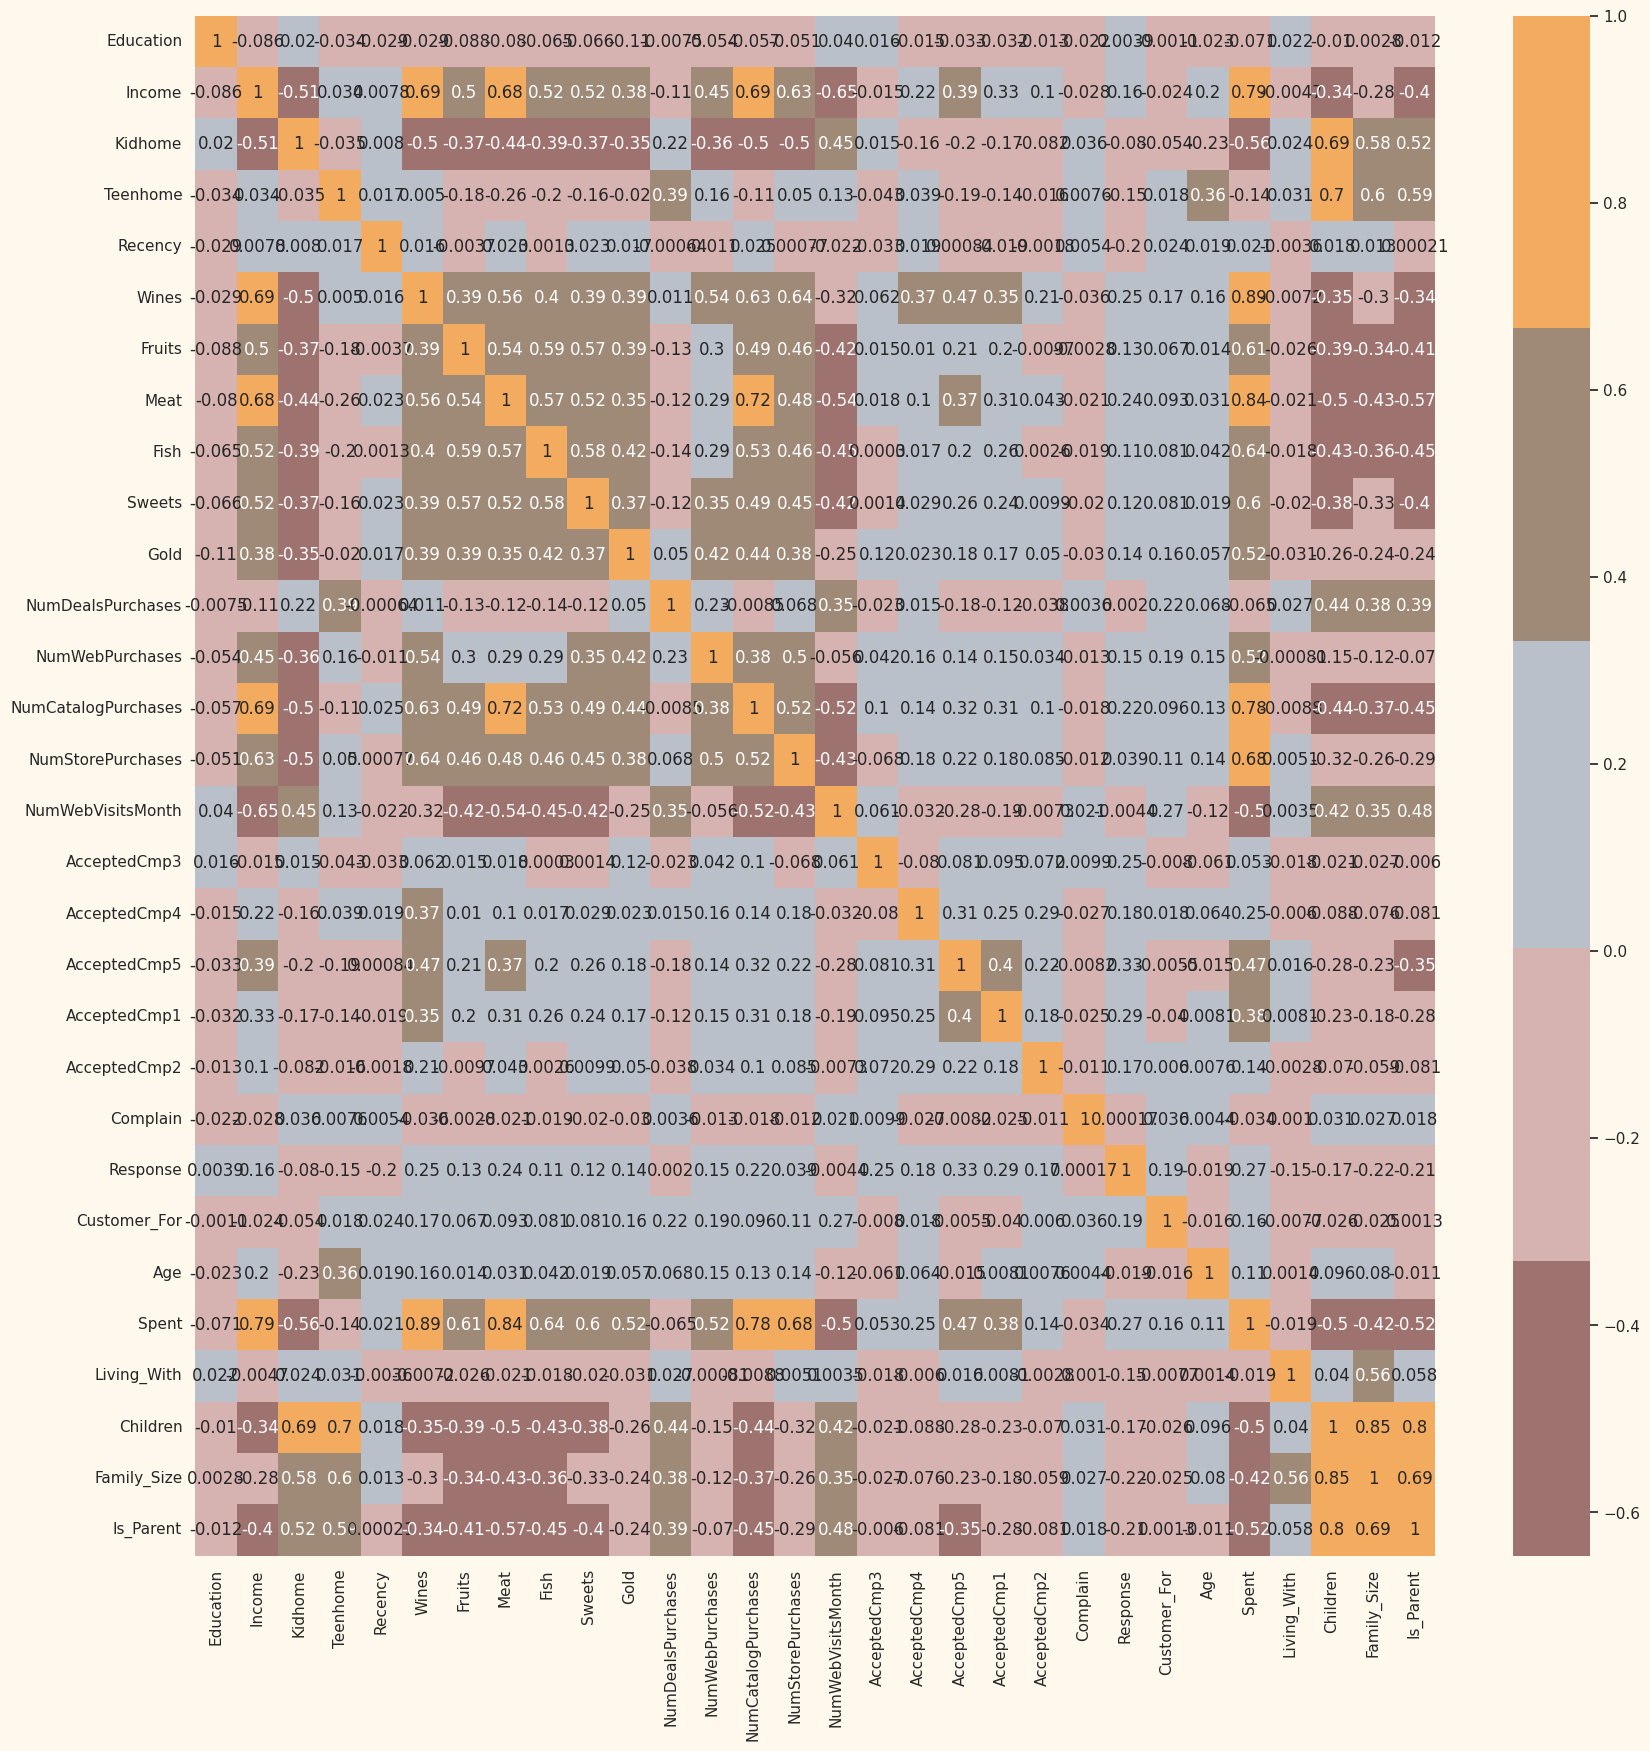

In [ ]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

## Feature Selection

Feature Selection adalah proses memilih subset fitur yang paling relevan dari dataset untuk digunakan dalam pelatihan model. Tujuannya adalah untuk meningkatkan kinerja model dengan mengurangi dimensi dataset, menghilangkan fitur yang tidak relevan atau berisik, dan mengurangi risiko overfitting.

In [ ]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0.0,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,57283200000000000,67,1617,0,0,1,0
1,0.0,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,9763200000000000,70,27,0,2,3,1
2,0.0,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,26956800000000000,59,776,1,0,2,0
3,0.0,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,12009600000000000,40,53,1,1,3,1
4,1.0,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,13910400000000000,43,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,61223.0,0,1,46,709,43,182,42,118,...,3,4,5,32918400000000000,57,1341,1,1,3,1
2236,1.0,64014.0,2,1,56,406,0,30,0,0,...,2,5,7,1641600000000000,78,444,1,3,5,1
2237,0.0,56981.0,0,0,91,908,48,217,32,12,...,3,13,6,13392000000000000,43,1241,0,0,1,0
2238,1.0,69245.0,0,1,8,428,30,214,80,30,...,5,10,3,13478400000000000,68,843,1,1,3,1


## Normalisasi

Normalisasi adalah proses mentransformasi data numerik sehingga nilainya berada dalam rentang tertentu, biasanya [0, 1]. Tujuan normalisasi adalah untuk memastikan bahwa fitur-fitur yang berbeda dalam dataset memiliki skala yang sama, sehingga tidak ada fitur yang mendominasi yang lain hanya karena skala yang berbeda

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for column in ds.columns:
    if df[column].dtype in ['int64', 'float64']:
        ds[column] = scaler.fit_transform(ds[[column]])
ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0.0,0.351086,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,...,0.357143,0.307692,0.35,0.948498,0.696429,0.639683,0.0,0.000000,0.00,0.0
1,0.0,0.277680,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,...,0.035714,0.153846,0.25,0.161660,0.750000,0.008730,0.0,0.666667,0.50,1.0
2,0.0,0.434956,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,...,0.071429,0.769231,0.20,0.446352,0.553571,0.305952,1.0,0.000000,0.25,0.0
3,0.0,0.155079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,...,0.000000,0.307692,0.30,0.198856,0.214286,0.019048,1.0,0.333333,0.50,1.0
4,0.5,0.352051,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,...,0.107143,0.461538,0.25,0.230329,0.267857,0.165476,1.0,0.333333,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.370288,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,...,0.107143,0.307692,0.25,0.545064,0.517857,0.530159,1.0,0.333333,0.50,1.0
2236,0.5,0.387659,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,...,0.071429,0.384615,0.35,0.027182,0.892857,0.174206,1.0,1.000000,1.00,1.0
2237,0.0,0.343885,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,...,0.107143,1.000000,0.30,0.221745,0.267857,0.490476,0.0,0.000000,0.00,0.0
2238,0.5,0.420217,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,...,0.178571,0.769231,0.15,0.223176,0.714286,0.332540,1.0,0.333333,0.50,1.0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

# Membuat objek KMeans
kmeans = KMeans()

# Menentukan grid parameter yang ingin ditelusuri
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [100, 200, 300],
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(kmeans, param_grid, cv=5)

# Melatih GridSearchCV pada data
grid_search.fit(data)

# Mencetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)


NameError: name 'data' is not defined

# Principal Component Analysis

Principal Component Analysis (PCA) adalah teknik statistik yang digunakan untuk mereduksi dimensi dataset sambil mempertahankan sebanyak mungkin variasi dalam data. PCA mengubah data ke dalam sistem koordinat baru di mana sumbu pertama (principal component) memiliki varians terbesar, sumbu kedua memiliki varians terbesar kedua, dan seterusnya.

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=2)
pca.fit(ds)
ds = pd.DataFrame(pca.transform(ds), columns=(["Feature 1","Feature 2"]))
ds.describe().T

In [ ]:
import matplotlib.pyplot as plt

x = ds["Feature 1"]
y = ds["Feature 2"]

plt.figure(figsize=(10, 8))
plt.scatter(x, y, c="blue", marker="o")
plt.title("A 2D Projection Of Data In The Reduced Dimension")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


Dari proses PCA diatas didapatkan hasil bahwa :
1. Dari nilai mean yang sangat mendekati nol, terlihat bahwa pusat dari kedua fitur baru ini berada di titik nol pada sumbu baru yang dihasilkan oleh PCA.
2. Rentang nilai yang teramati menunjukkan variasi data dalam dua fitur utama yang dihasilkan oleh PCA.

Kesimpulannya, setelah proses PCA, data telah direduksi menjadi dua dimensi (dengan dua fitur utama) dan dipersebar di sekitar titik pusat yang baru. Dua fitur baru ini mewakili variasi maksimum dalam data dengan dimensi yang lebih rendah, namun tetap mempertahankan sebagian besar informasi yang ada dalam data asli.

# **Clustering**

Clustering adalah teknik dalam analisis data yang digunakan untuk mengelompokkan objek data ke dalam kelompok-kelompok yang serupa, yang disebut cluster, berdasarkan kesamaan karakteristik atau pola dalam data. Tujuan utama dari clustering adalah untuk menemukan struktur tersembunyi dalam data dan mengelompokkan objek-objek data ke dalam kelompok-kelompok yang memiliki kesamaan.

Pada proses clustering ini ada beberapa tahapan :
1. Elbow Method untuk menentukan jumlah cluster optimal dalam algoritma k-means
2. Menggunakan 2 Metode yaitu K-means dan juga Mini Bitch K-means

### Elbow Method

Elbow Method adalah salah satu metode yang digunakan untuk menentukan jumlah optimal dari cluster dalam algoritma k-means. Elbow Method bekerja dengan cara memplot jumlah cluster terhadap Within-Cluster Sum of Squares (WCSS), yang merupakan metrik untuk mengukur seberapa kompak cluster tersebut.


In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(ds)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

print("Elbow Method to determine the number of clusters to be formed:")
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(ds)
Elbow_M.show()

Interpretasi Kurva Elbow:
1. Siku: Titik di mana penurunan WCSS mulai melambat secara signifikan. Inilah jumlah cluster optimal.
2. Area sebelum Siku: Penambahan cluster masih memberikan penurunan yang signifikan dalam WCSS.
3. Area setelah Siku: Penambahan cluster tidak memberikan penurunan WCSS yang signifikan lagi.

Elbow Method membantu dalam menemukan jumlah cluster optimal dalam algoritma k-means dengan menentukan titik di mana penurunan WCSS mulai melambat secara signifikan. Dengan menentukan jumlah cluster yang optimal, kita dapat membuat model clustering yang lebih efisien dan efektif untuk analisis data.

# **Metode K-Means**

K-Means adalah salah satu algoritma clustering yang paling populer dan sederhana. Tujuannya adalah untuk mengelompokkan titik data ke dalam beberapa cluster berdasarkan atribut atau fitur yang dimiliki. Algoritma K-Means berusaha untuk membagi data menjadi k kelompok yang berbeda sedemikian rupa sehingga setiap titik data berada dalam kelompok yang memiliki rata-rata atau centroid yang terdekat.

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, n_init="auto")
kmeans.fit(ds)
y_kmeans = kmeans.predict(ds)

In [ ]:
df['cluster']=y_kmeans
df.head()

In [ ]:
ds['cluster']=y_kmeans
ds.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
# Plotting the clusters and their centroids

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=40, c=ds["cluster"], marker='o', cmap="viridis")
plt.title("The Plot Of The Cluster")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.legend()
plt.grid(True)
plt.show()


1. Cluster 0:

- Centroid: [0.83714756, -0.46413261]
- Interpretasi: Cluster ini memiliki koordinat centroid di sekitar (0.84, -0.46) dalam ruang fitur yang dipertimbangkan. Titik-titik data dalam cluster ini cenderung memiliki nilai yang lebih tinggi untuk fitur pertama dan nilai yang lebih rendah untuk fitur kedua.

2. Cluster 1:

- Centroid: [-0.4530681, -0.31099184]
- Interpretasi: Cluster ini memiliki koordinat centroid di sekitar (-0.45, -0.31). Titik-titik data dalam cluster ini cenderung memiliki nilai yang lebih rendah untuk kedua fitur.

3. Cluster 2:

- Centroid: [-0.25654165, 0.69280722]
- Interpretasi: Cluster ini memiliki koordinat centroid di sekitar (-0.26, 0.69). Titik-titik data dalam cluster ini cenderung memiliki nilai yang lebih tinggi untuk fitur kedua dan nilai yang lebih rendah untuk fitur pertama.

4. Cluster 3:

- Centroid: [1.05473533, 0.53749033]
- Interpretasi: Cluster ini memiliki koordinat centroid di sekitar (1.05, 0.54). Titik-titik data dalam cluster ini cenderung memiliki nilai yang lebih tinggi untuk kedua fitur.

# **Metode Mini-Batch K-Means**

In [ ]:
batchkmeans_df = ds
batchkmeans_df

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Inisialisasi Mini-Batch KMeans dengan jumlah cluster yang ditentukan
minibatch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42)

# Melatih model Mini-Batch KMeans
minibatch_kmeans.fit(ds.values)  # Accessing the underlying NumPy array

# Prediksi label cluster untuk setiap data
minibatch_labels = minibatch_kmeans.predict(ds.values)  # Accessing the underlying NumPy array


In [ ]:
df['cluster2']=y_kmeans
df.head()

In [ ]:
ds['cluster2']=y_kmeans
ds.head()

In [ ]:
minibatch_kmeans.cluster_centers_

In [ ]:

# Visualisasi hasil clustering menggunakan Mini-Batch KMeans
plt.figure(figsize=(10, 8))
plt.scatter(ds.values[:, 0], ds.values[:, 1], c=minibatch_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Clustering with Mini-Batch K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(minibatch_kmeans.cluster_centers_[:, 0], minibatch_kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# **Evaluasi**

Nilai skor siluet berkisar antara -1 hingga 1. Semakin dekat ke 1, semakin baik kualitas clusteringnya. Nilai 1 menunjukkan bahwa cluster terpisah dengan jelas, sementara nilai negatif menunjukkan bahwa sebagian besar titik data mungkin ditempatkan di cluster yang salah.

In [ ]:
from sklearn import metrics

kmeans_model = kmeans
labels = kmeans_model.labels_
metrics.silhouette_score(ds, labels, metric="euclidean")

nilai skor siluet sebesar 0.766760187416826 menunjukkan bahwa hasil clustering memiliki kualitas yang baik, dengan cluster-cluster yang terpisah dengan jelas.
Jadi nilai skor siluet yang tinggi menunjukkan bahwa pengelompokan yang dihasilkan oleh model K-Means adalah cukup baik dan sesuai dengan struktur data yang ada.

In [ ]:
from sklearn import metrics

minibatch_kmeans_model = minibatch_kmeans
labels = minibatch_kmeans_model.labels_
metrics.silhouette_score(ds, labels, metric="euclidean")

Output "0.7834961116766547" adalah bahwa Silhouette Score yang dihasilkan adalah sekitar 0.78, yang menunjukkan bahwa hasil clustering memiliki pengelompokan yang baik, dengan observasi dalam setiap cluster cenderung berada dekat satu sama lain dan terpisah dari cluster lain. Semakin tinggi nilai Silhouette Score, semakin baik kualitas pengelompokan (clustering) yang dihasilkan.

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=ds["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

## Profiling

Profil data (data profiling) adalah proses analisis data yang bertujuan untuk memahami struktur, kualitas, dan karakteristik dari dataset. Tujuan utama dari profil data adalah untuk memberikan wawasan yang mendalam tentang dataset yang digunakan, termasuk pemahaman tentang atribut-atributnya, distribusi nilainya, keberadaan nilai yang hilang, anomali, dan informasi lain yang berguna.

Dibawah ini menampilkan beberapa grafik menggunakan seaborn untuk memvisualisasikan hubungan antara beberapa fitur dalam dataset dengan fitur target "Spent", dengan mempertimbangkan label cluster yang diberikan oleh kolom "cluster".

In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["cluster"], kind="kde", palette=pal)
    plt.show()

dari profiling diatas dapat kita ketahui bahwa:

**Cluster 0**
* terindikasi sebagai orangtua/parent
* maksimal memiliki 4 anggota keluarga dan minimal 2
* orangtua tunggal adalah subset dari kelompok ini
* sebagian besar memiliki anak remaja/teenager di rumah
* anggota dari kelompok ini relatif lebih tua

**Cluster 1**
* Bukan Parent
* Maksimal hanya 2 anggota keluarga
* Mayoritas berpasangan
* Menjangkau segala usia
* Kelompok berpendapatan tinggi

**Cluster 2**
* Mayoritas adalah 0rang tua/parent
* Maksimal memiliki 3 angggota keluarga
* Sebagian besar mempunyai satu anak dan bukan remaja
* Anggota relatif lebih muda

**Cluster 3**
* Pasti parent
* Maksimal berjumlah 5 anggota keluarga dan minimal 2
* Mayoritas memiliki anak remaja
* Relatif lebih tua
* Kelompok berpenghasilan rendah



# **Kesimpulan**

Dalam proyek ini, saya melakukan analisis tanpa supervisi untuk mengelompokkan pelanggan. Langkah pertama yang saya lakukan adalah menggunakan teknik reduksi dimensi, yang membantu saya mengurangi kompleksitas data dengan mempertahankan informasi yang penting. Selanjutnya, saya menerapkan algoritma pengelompokan aglomeratif untuk mengelompokkan pelanggan menjadi 4 kelompok berbeda berdasarkan pola-pola yang tersembunyi dalam data. Setelah mendapatkan kelompok-kelompok tersebut, saya menggali lebih dalam untuk memahami struktur keluarga dan pola pendapatan/pengeluaran mereka. Hal ini memungkinkan saya untuk membuat profil yang lebih rinci untuk setiap kelompok pelanggan, yang dapat digunakan sebagai landasan untuk merumuskan strategi pemasaran yang lebih efektif dan sesuai dengan kebutuhan dan preferensi masing-masing kelompok.